## Import functions and define universal values

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0,'./code')
import eigencurves
import eigenmaps
import kmeans
import bin_eigenspectra
import os
import pdb
import spiderman as sp
import healpy as hp
import run_higher_sph_harm_prefit
import plot_utils

#May need to add things

lcName='W18_NIRISS_spec_lambin_25_prefit_test_16_v3'
planetparams={}
planetparams['t0']=2459802.4078798565 #units of days
planetparams['per']=0.941452382 #units of days
planetparams['a_abs']=0.0218 #units of AU
planetparams['inc']=84.35320 #units of degrees
planetparams['ecc']=0.0 #unitless
planetparams['w']=269. #units of degrees
planetparams['rprs']=0.09783 #unitless ratio
planetparams['ars']=3.48023 #unitless ratio
planetparams['t_sec']=2459802.8786060475 #units of days


## Load in data and set up data dictionary

[-151.80721751  134.72413971]


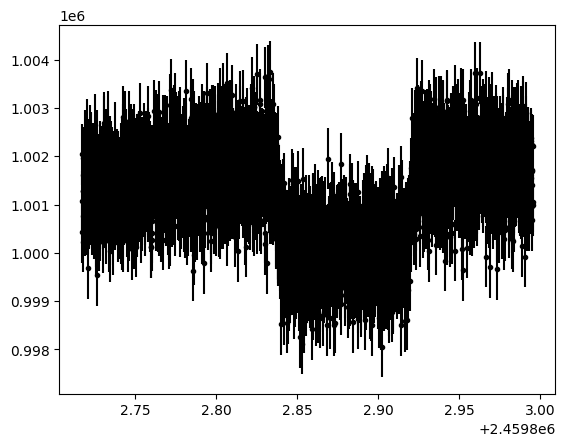

In [5]:
waveind=16 #for fitting a single wavelength
specfile=np.load('./real_spec/bin25/ind_bins_'+str(waveind)+'.npz')
#specfile=np.load('spec_lambin_25.npz')
time=specfile['arr_0']
#waves=specfile['arr_1']
waves=np.array([specfile['arr_1']])
fluxes=specfile['arr_2']+10**6.
errs=specfile['arr_3']
extent=np.zeros(2)
extent[0]=(np.min(time)-planetparams['t_sec'])/planetparams['per']*2.*np.pi-np.pi/2. #minimum observed point, in radians
extent[1]=(np.max(time)-planetparams['t_sec'])/planetparams['per']*2.*np.pi+np.pi/2. #maximum observed point, in radians
print(extent*180./np.pi)

plt.figure()
plt.errorbar(time,fluxes,yerr=errs,color='k',marker='.',linestyle='none')
plt.show()

datadict={"time (days)":time, "wavelength (um)":waves, "flux (ppm)": fluxes, "flux err (ppm)": errs}


## Perform eigencurve fitting at each wavelength

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 3


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 1.9152772286965757e-11)
1.0
-31285.149834991265
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 1.9563330064584047e-11)
0.005183674226223875
-31285.149834991265
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
[ 2.91228150e-04  1.00022074e+00 -4.48961803e-06  1.73575425e-04]
Running MCMC at 2.1563196369930813 um


100%|█████████████████████████████████████████| 300/300 [00:43<00:00,  6.89it/s]


-31285.149834991265 -31919.149834991265 634.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


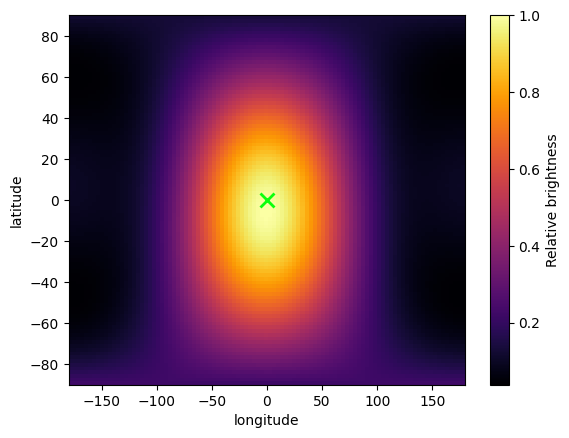

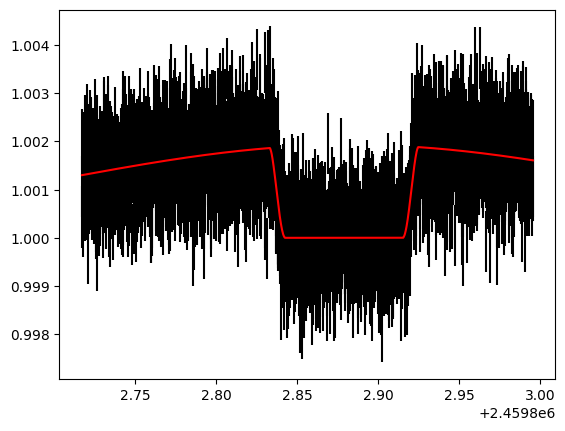

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 3


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 4.6256879184435285e-06)
1.0
-31292.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 1.631459098192545e-06)
0.015026000490205901
-31297.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 1.8433714809007006e-06)
0.057755484014408866
-31291.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf

100%|█████████████████████████████████████████| 300/300 [00:42<00:00,  7.14it/s]


-31295.241815546633 -31908.241815546633 613.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


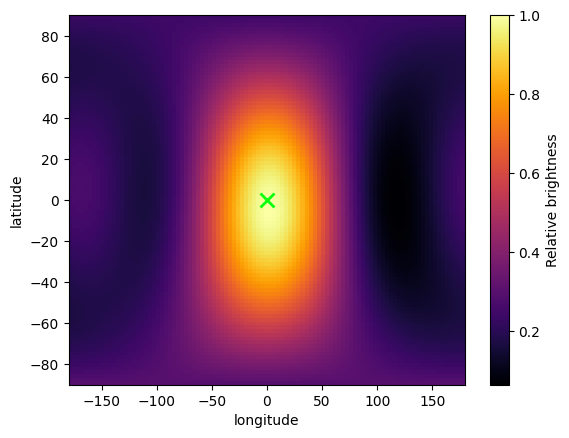

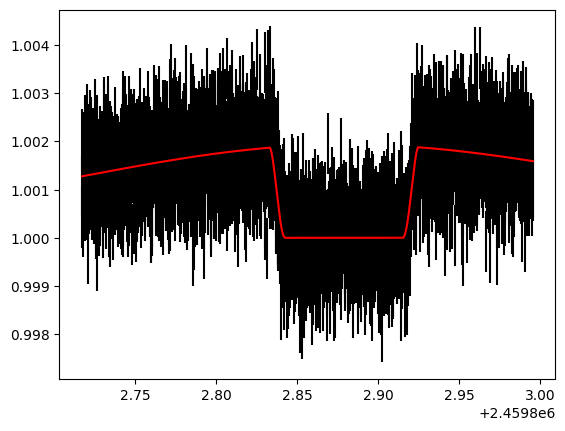

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 3


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 8.932185667518913e-11)
1.0
-31265.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 9.010548878413951e-12)
0.02316553111545817
-31267.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 3.9729806743063236e-10)
2.7211128795431064e-05
-31267.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
   

100%|█████████████████████████████████████████| 300/300 [00:42<00:00,  7.12it/s]


-31267.333796102 -31895.333796102 628.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


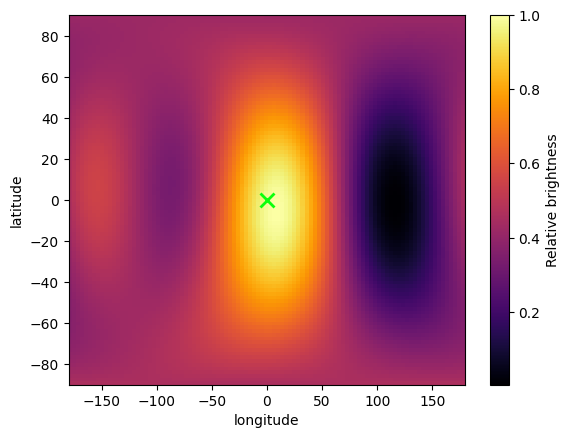

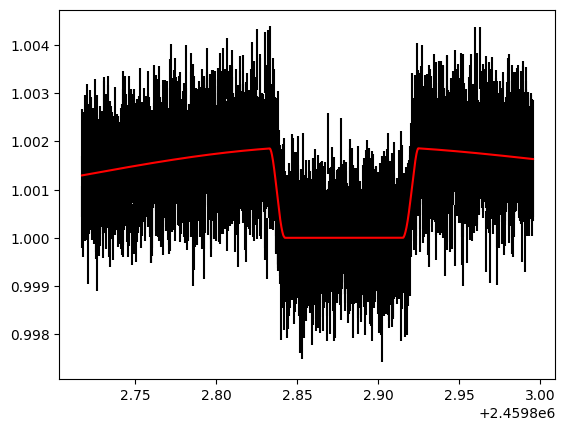

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 3


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 2.0479726364917645e-11)
1.0
-31255.42577665737
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 2.0479726364917645e-11)
0.0
-31255.42577665737
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
[ 3.97905635e-04  9.99877779e-01 -1.29292454e-05  1.04568600e-04
  7.27753751e-05  2.30204854e-05  4.71331396e-05]
Running MCMC at 2.1563196369930813 um


100%|█████████████████████████████████████████| 300/300 [00:43<00:00,  6.87it/s]


-31255.42577665737 -31892.42577665737 637.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


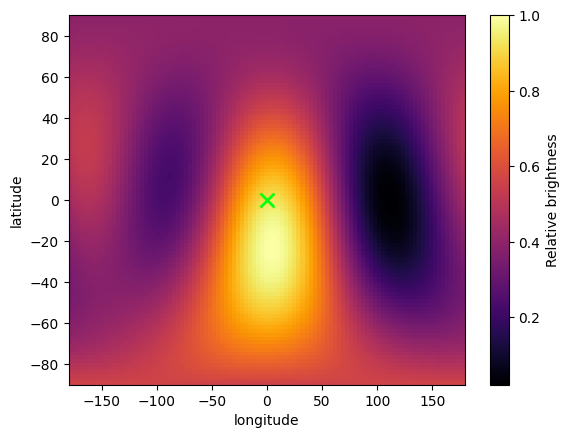

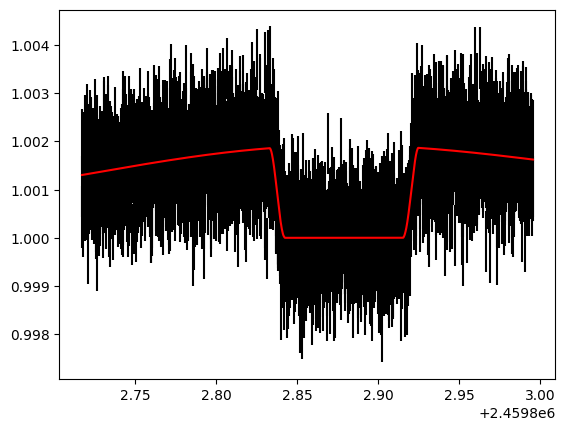

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 3


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 3.2374832308997186e-13)
1.0
-31192.517757212736
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 9.454532186503883e-11)
0.6179169457197493
-31195.517757212736
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 9.53759450707352e-12)
0.6389262501331753
-31244.517757212736
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici


100%|█████████████████████████████████████████| 300/300 [00:43<00:00,  6.91it/s]


-31255.517757212736 -31869.517757212736 614.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


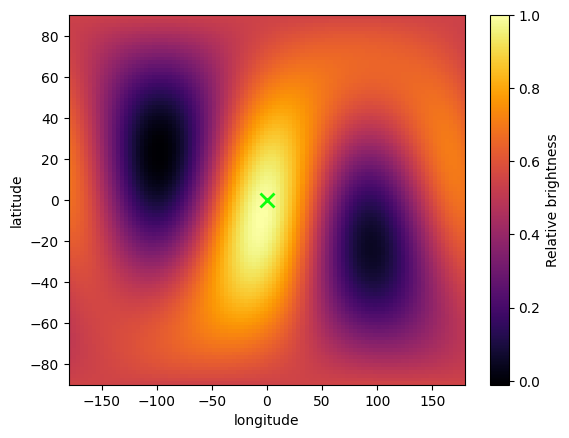

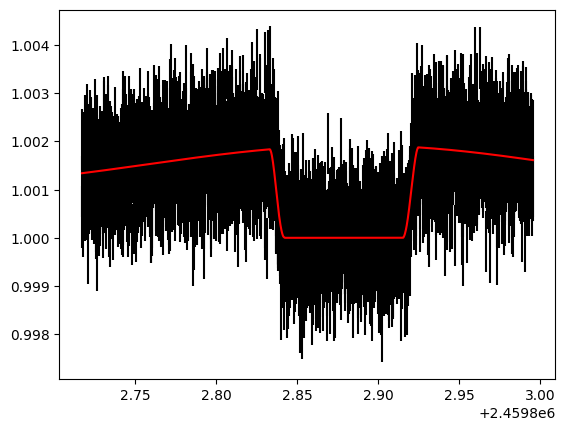

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 4


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 2.0739408790430295e-11)
1.0
-31291.149834991265
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 2.6570183643777498e-11)
0.0016338251238240816
-31291.149834991265
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
[ 2.91521986e-04  1.00021978e+00 -4.50328217e-06  1.73361368e-04]
Running MCMC at 2.1563196369930813 um


100%|█████████████████████████████████████████| 300/300 [01:34<00:00,  3.16it/s]


-31291.149834991265 -31913.149834991265 622.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


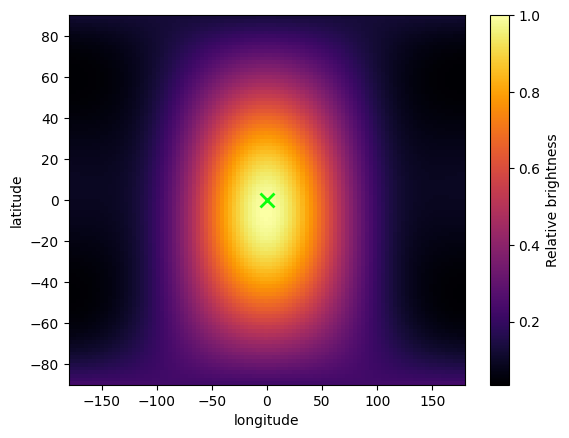

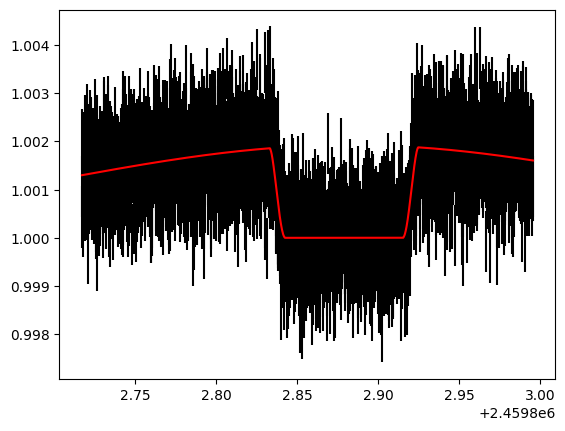

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 4


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 5.4665615946771465e-05)
1.0
-31295.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 5.456498365464144e-05)
0.001638852689695023
-31295.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
[ 3.16191076e-04  1.00014049e+00 -6.45341535e-06  1.57968578e-04
 -3.00489465e-05]
Running MCMC at 2.1563196369930813 um


100%|█████████████████████████████████████████| 300/300 [01:33<00:00,  3.22it/s]


-31295.241815546633 -31905.241815546633 610.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


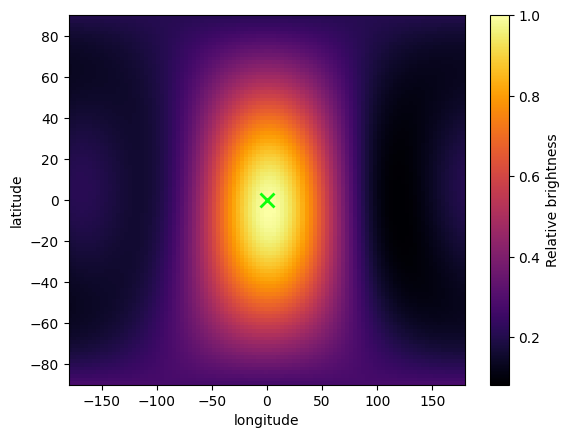

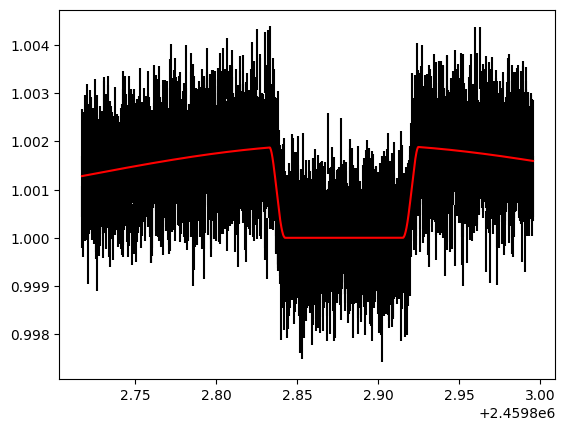

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 4


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 1.72696487259222e-12)
1.0
-31264.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 1.010455937667169e-11)
2.5843038453825525e-06
-31264.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
[ 3.56360700e-04  1.00001134e+00 -9.57773059e-06  1.31619818e-04
 -4.83539000e-05 -2.62996464e-05]
Running MCMC at 2.1563196369930813 um


100%|█████████████████████████████████████████| 300/300 [01:34<00:00,  3.17it/s]


-31264.333796102 -31895.333796102 631.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


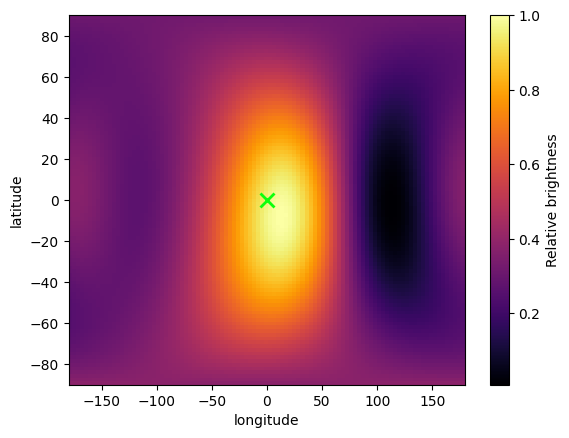

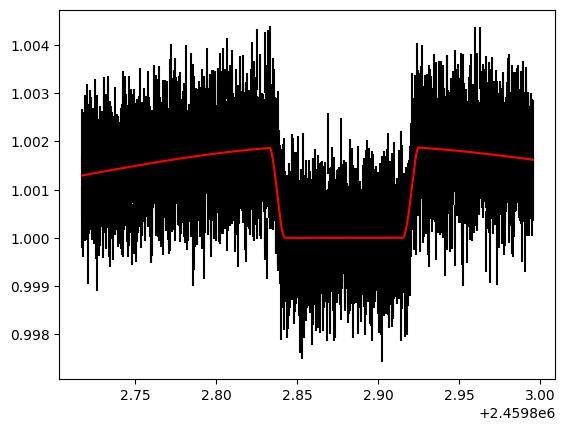

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 4


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 6.150122201366344e-11)
1.0
-31206.42577665737
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 5.437173896575773e-12)
1.2134416053864698
-31237.42577665737
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 1.1549480686979563e-10)
19.150545754609116
-31263.42577665737
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
  

100%|█████████████████████████████████████████| 300/300 [01:33<00:00,  3.22it/s]


-31262.42577665737 -31890.42577665737 628.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


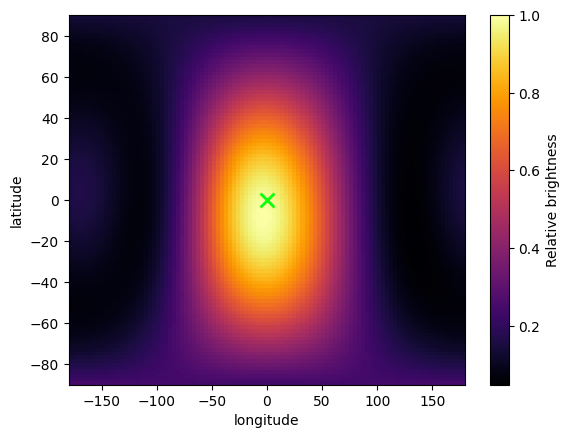

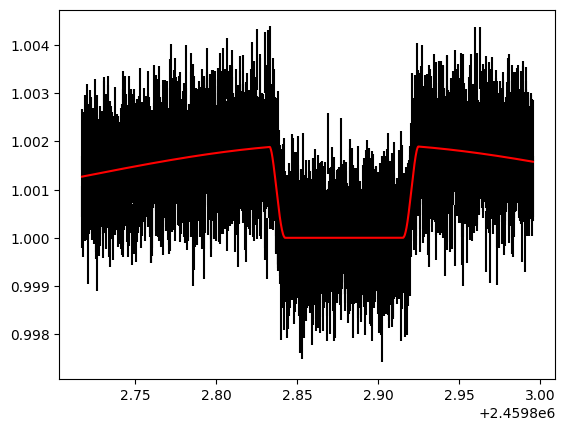

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 4


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 3.365924685580469e-08)
1.0
-31254.517757212736
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 8.992154694411262e-12)
0.45254502618602244
-31254.517757212736
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 7.513991412240689e-08)
0.10525498845053918
-31255.517757212736
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bic

100%|█████████████████████████████████████████| 300/300 [01:34<00:00,  3.17it/s]


-31253.517757212736 -31874.517757212736 621.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


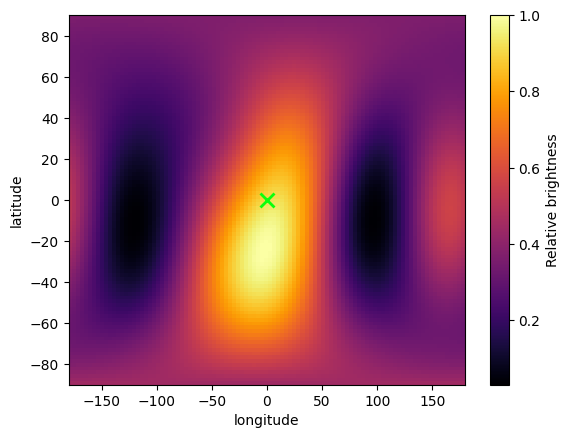

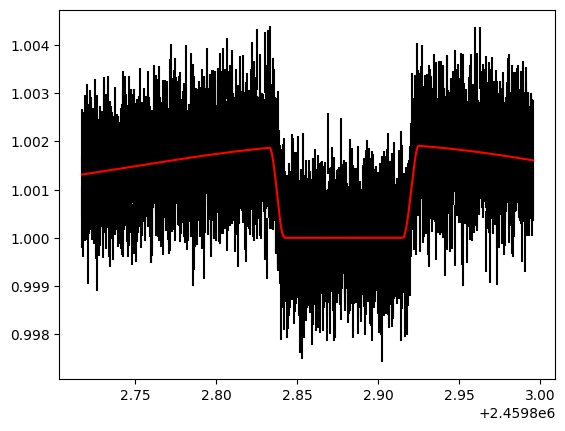

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 5


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 2.342644625145802e-11)
1.582064368731859
-31287.149834991265
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 2.4851793039730316e-11)
0.08490774364354996
-31290.149834991265
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> 
ipdb> c
(False, 2.8628697183042546e-12)
1.3533199355698208e-05
-31290.149834991265
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    51

100%|█████████████████████████████████████████| 300/300 [03:14<00:00,  1.54it/s]


-31290.149834991265 -31917.149834991265 627.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


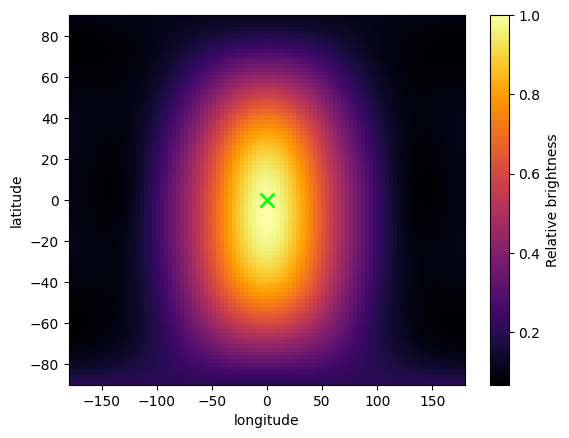

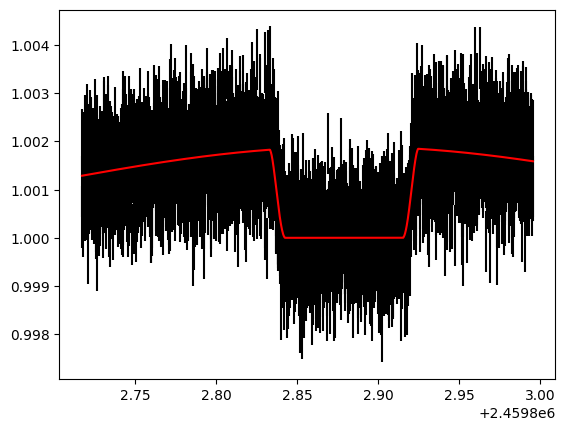

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 5


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 9.91098106633947e-13)
1.0
-31261.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 1.4862005296379193e-11)
0.04371648410758545
-31275.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 5.482299744894004e-13)
29.84525046208648
-31258.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici


100%|█████████████████████████████████████████| 300/300 [03:16<00:00,  1.53it/s]


-31261.241815546633 -31888.241815546633 627.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


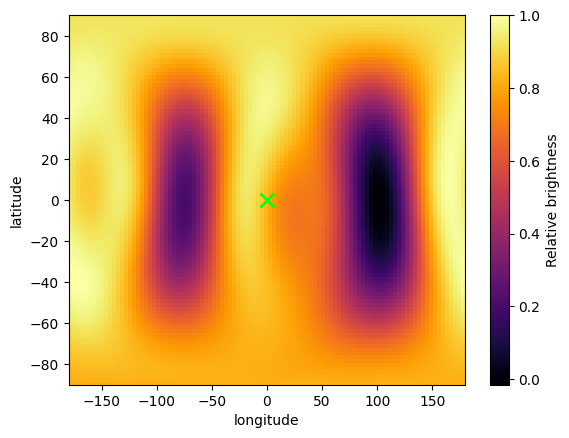

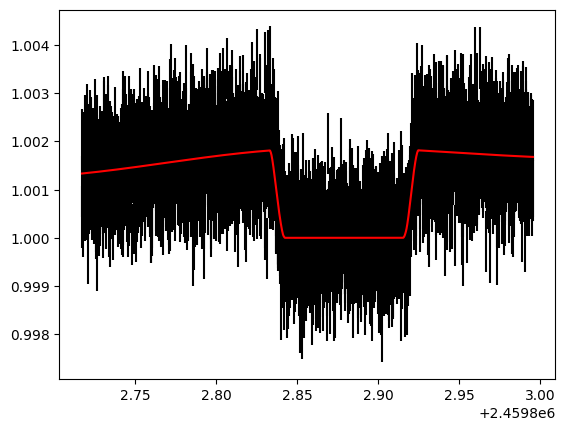

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 5


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 3.93135961769493e-10)
1.0
-31301.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 4.15644731653348e-12)
0.3376537423308554
-31282.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 5.748374827939049e-09)
0.03489033796449875
-31270.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519   

100%|█████████████████████████████████████████| 300/300 [03:17<00:00,  1.52it/s]


-31270.333796102 -31874.333796102 604.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


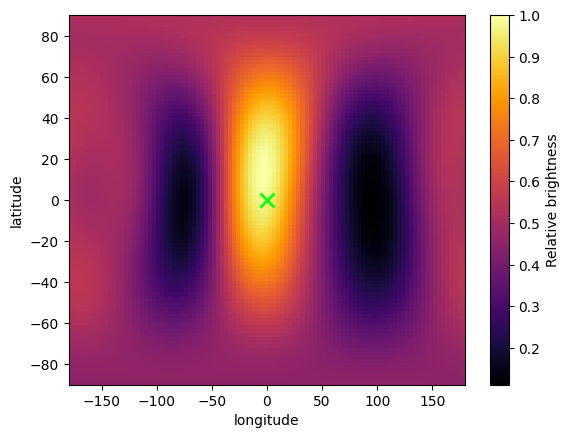

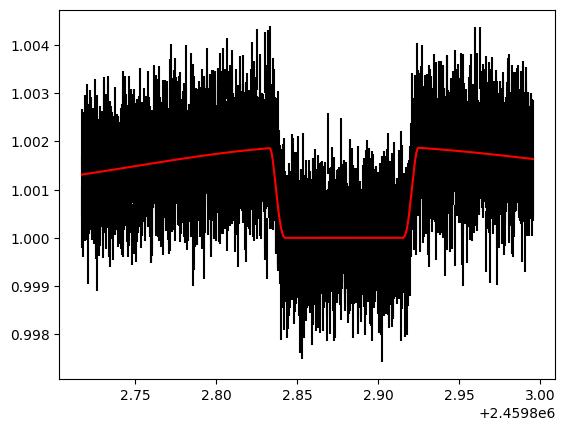

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 5


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 4.0208120042016696e-08)
1.0
-31017.42577665737
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 1.60131204261945e-07)
15.395321939112453
-31270.42577665737
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 2.0764864093661826e-06)
0.6598951247285559
-31251.42577665737
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
  

100%|█████████████████████████████████████████| 300/300 [03:18<00:00,  1.51it/s]


-31264.42577665737 -31889.42577665737 625.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


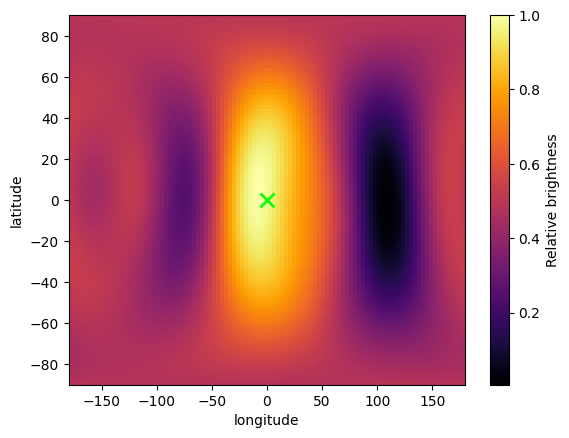

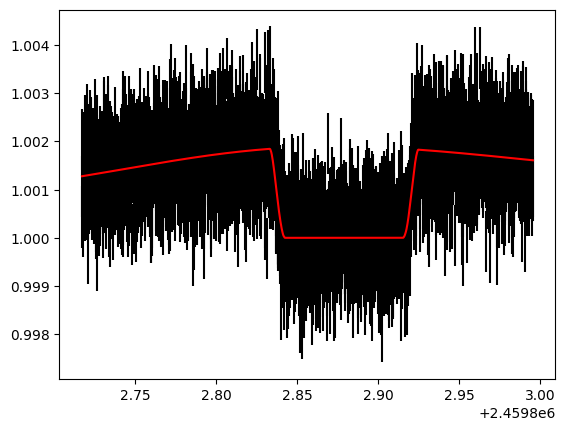

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 5


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 1.1026039032155806e-08)
1.0
-30880.517757212736
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 1.6389885789407828e-10)
29.46421267976262
-31235.517757212736
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 3.601119116932618e-12)
0.4996465055816849
-31224.517757212736
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici

100%|█████████████████████████████████████████| 300/300 [03:28<00:00,  1.44it/s]


-31225.517757212736 -31857.517757212736 632.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


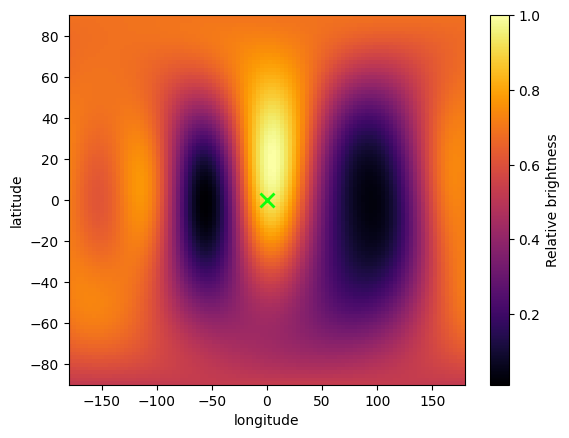

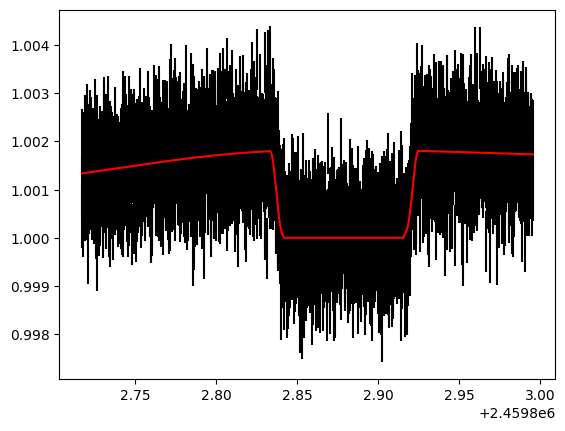

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 6


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 5.160248504589098e-11)
1.583420702223346
-31290.149834991265
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 5.160248504589098e-11)
0.0
-31290.149834991265
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
[ 2.93773357e-04  1.00021257e+00  4.58116723e-06 -1.71402900e-04]
Running MCMC at 2.1563196369930813 um


100%|█████████████████████████████████████████| 300/300 [06:42<00:00,  1.34s/it]


-31290.149834991265 -31919.149834991265 629.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


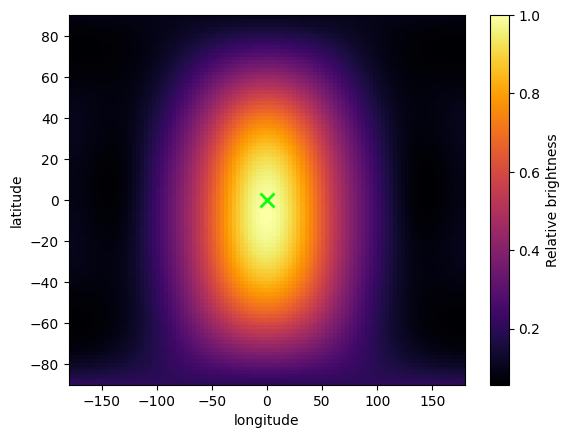

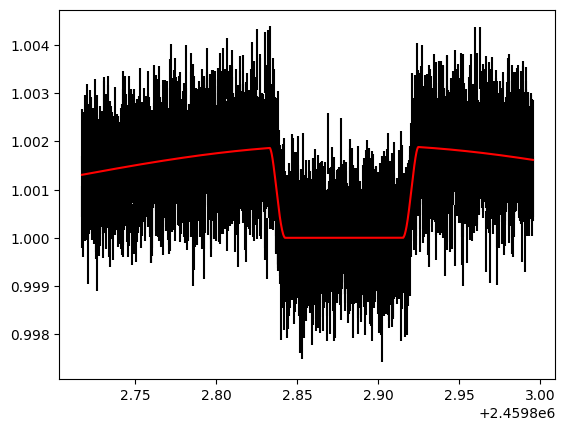

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 6


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 3.3757355869910373e-12)
1.0
-31267.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 1.0360003946290095e-13)
0.36377815341735753
-31275.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 6.077857494199684e-07)
5.4401279158292715
-31279.241815546633
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bi

100%|█████████████████████████████████████████| 300/300 [06:28<00:00,  1.30s/it]


-31277.241815546633 -31885.241815546633 608.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


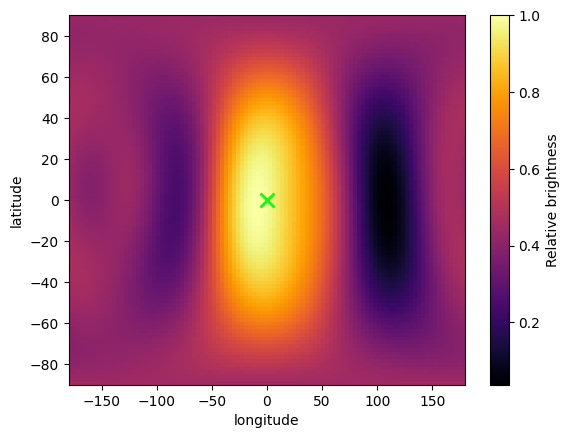

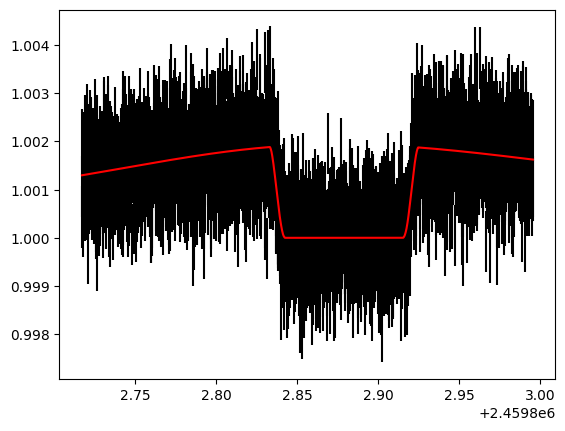

No previous run found, so running MCMC.
This can take a long time, especially for higher spherical harmonic orders
Fitting eigencurves now for order 6


./code/eigencurves_prefit.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


(False, 3.4209256695768e-14)
1.0
-31189.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 2.939245350827482e-05)
1.0860980572118257
-31259.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519                 pdb.set_trace()
--> 520                 while any(del_params>0.01):
    521                         bici=bicf
    522                         fit_params_old = fit_params

ipdb> c
(False, 4.866726297088067e-13)
0.7425806268232241
-31266.333796102
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(520)eigencurves()
    518                 bicf=bici
    519    

100%|█████████████████████████████████████████| 300/300 [06:23<00:00,  1.28s/it]


-31271.333796102 -31878.333796102 607.0
> /Users/megan/Documents/Projects/JWST_ERS/EclipseMap/code/eigencurves_prefit.py(603)eigencurves()
    601                 # # fullchainarray.append(fullchain)
    602 
--> 603                 bestcoeffs=bestfit[1:]
    604                 # bestcoeffs=fit_params
    605 

ipdb> c


./code/eigencurves_prefit.py:603: ComplexWarning: Casting complex values to real discards the imaginary part
  bestcoeffs=bestfit[1:]


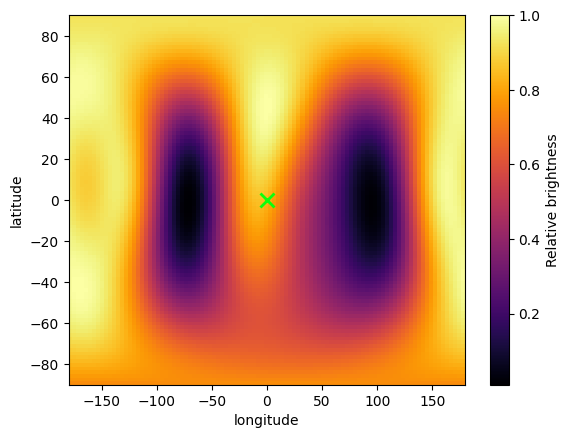

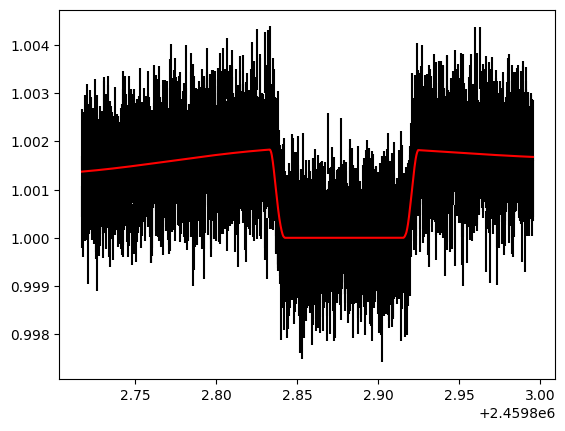

In [ ]:

#Test fitting with spherical harmonics to order=2,3,4
#Afew>=20 will fit for the correct number of coefficients
saveDir = "./data/sph_harmonic_coefficients_full_samples/" + lcName
for oneOrd in np.arange(3,7):
    for afew in np.arange(2,7):
        run_higher_sph_harm_prefit.run_lc_fit(datadict,planetparams,norder=oneOrd,lcName=lcName,saveDir=saveDir,\
                                              afew=int(afew),burnin=3000,nsteps=30000,plot=True,strict=False,nonegs=True)


## Plot 2D maps

In [ ]:
dataDir=saveDir+'/'
for i in np.arange(20):
    waves, lats, lons, mapLowMedHigh = plot_utils.get_map_and_plot(planetparams,dataDir,afew=20,waveInd=0,degree=3,isspider=False,saveName='W18_spec')
#FINDME: using a different waveInd will show maps at a different wavelength
#using a different degree will show a fit with a different number of spherical harmonics
#isspider=False uses Arthur's implementation of converting from lightcurves to maps (faster than the SPIDERMAN method and identical maps are produced)
#The middle map (labeled 50th percentile map) shows the single best-fit map with the lowest chi-squared

## Converting Fp/Fs map into planet temperature map

In [ ]:
Ts=6400.
# c=2.998*10**8.
# h=6.626*10**-34.
# kb=1.381*10**-23.
# lam=1.7*10**-6.
rprs=planetparams['rprs']
medianmap=mapLowMedHigh[1][0]
medianmap[medianmap<0.]=0. #FINDME: remove this if you want the real fluxes instead of removing fluxes below zero
mapinTemp=plot_utils.plot_map_in_temp(Ts,lam,dlam,rprs,lats,lons,medianmap,extent,waveInd=0,degree=3,plot=True,saveName='W18_spec')


## Calculate brightest point in longitude and latitude

In [ ]:
hotlats,hotlons = plot_utils.find_hotspot(planetparams,dataDir,afew=20,waveInd=0,degree=3,saveName='W18_spec',isspider=False)
